# Mengimport Library

Pada model machine learning berikut akan diterapkan algoritma K Means Clustering dalam pengelompokkan unsupervised learning pada dataset cuaca

In [43]:
import sys
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Menampung dataset ke dalam dataframe dan menampilkannya

In [44]:
df = pd.read_csv('/content/seattle-weather.csv')

df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Melihat kembali apakah data memiliki nilai NULL

In [45]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# Standardisasi data yang akan diolah

In [ ]:
StandardScaler().fit_transform(df[['temp_max', 'temp_min']])

# Pembuatan dan pelatihan model KMeans clustering dengan atribut temp_max dan temp_min

In [47]:
model = KMeans(n_clusters = 6)

model.fit(df[['temp_max',	'temp_min']])

KMeans(n_clusters=6)

# Hasil clustering dari KMeans

In [48]:
labels = model.labels_
np.set_printoptions(threshold=sys.maxsize)
print(labels)

[0 2 0 0 2 5 2 2 2 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 5 5 2 2 2 2 2 0 0 0 0
 4 2 0 0 2 2 2 5 5 2 2 2 2 2 0 2 2 2 2 5 5 5 5 5 2 0 0 2 5 5 0 2 2 2 2 5 2
 0 2 2 5 5 2 2 2 2 0 0 0 0 0 2 2 2 2 0 2 2 2 2 0 4 4 4 0 0 0 0 4 0 2 0 0 0
 4 3 3 4 4 0 0 4 4 0 0 0 0 0 0 4 3 4 0 0 4 3 3 1 3 4 4 4 4 4 4 0 0 4 3 3 4
 4 4 4 4 3 4 4 0 0 0 4 0 4 4 3 4 4 4 3 3 4 4 4 3 3 4 4 4 4 4 3 3 3 3 3 4 4
 4 3 3 1 1 3 3 1 3 3 3 4 1 3 3 3 3 3 3 4 3 1 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3
 3 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 4 3 1 3 3
 3 1 1 3 4 4 4 4 3 4 4 3 3 3 4 3 4 4 4 3 3 3 4 4 0 0 0 4 4 4 4 0 4 4 0 0 2
 0 0 0 0 4 4 4 4 4 4 4 4 4 0 0 0 2 2 5 2 0 0 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2
 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 5 5 2 2 5 2 5 5 2 2 2 2 2 2 2 2 5 5 5 5 5 2
 2 2 2 0 2 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 2 2 2 2
 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 2 2 2 0 2 2 2 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 0 0 0 4 4 4 4 4 0 4 4 4 0 2 0 0 4 0 2 2 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 0 0 0 4 3 3 1 1 3 

# Menampilkan perbandingan antara label pada dataset dan hasil clustering

In [49]:
df_kmeans = pd.DataFrame({'labels': labels, 'weather': df.weather})
crosstab = pd.crosstab(df_kmeans['labels'], df_kmeans['weather'])
print(crosstab)

weather  drizzle  fog  rain  snow  sun
labels                                
0              7   21   217     1   84
1              6   12    13     0  154
2              6   18   178     8   64
3             14   23    72     0  184
4              8   19   139     0  106
5             12    8    22    17   48


# variabel yang akan diolah pada grafik

In [50]:
xs = df[['temp_max']]
ys = df[['temp_min']]

# Centroid pada data

In [51]:
centroids = model.cluster_centers_
centroidX = centroids[:, 0]
centroidY = centroids[:, 1]

print(centroids)

[[13.01090909  6.49818182]
 [28.88972973 14.92432432]
 [ 9.01934307  3.24854015]
 [22.70614334 12.57030717]
 [17.36985294  9.86323529]
 [ 4.95794393 -1.21869159]]


# Perbandingan grafik antara hasil clustering KMeans dan data asli

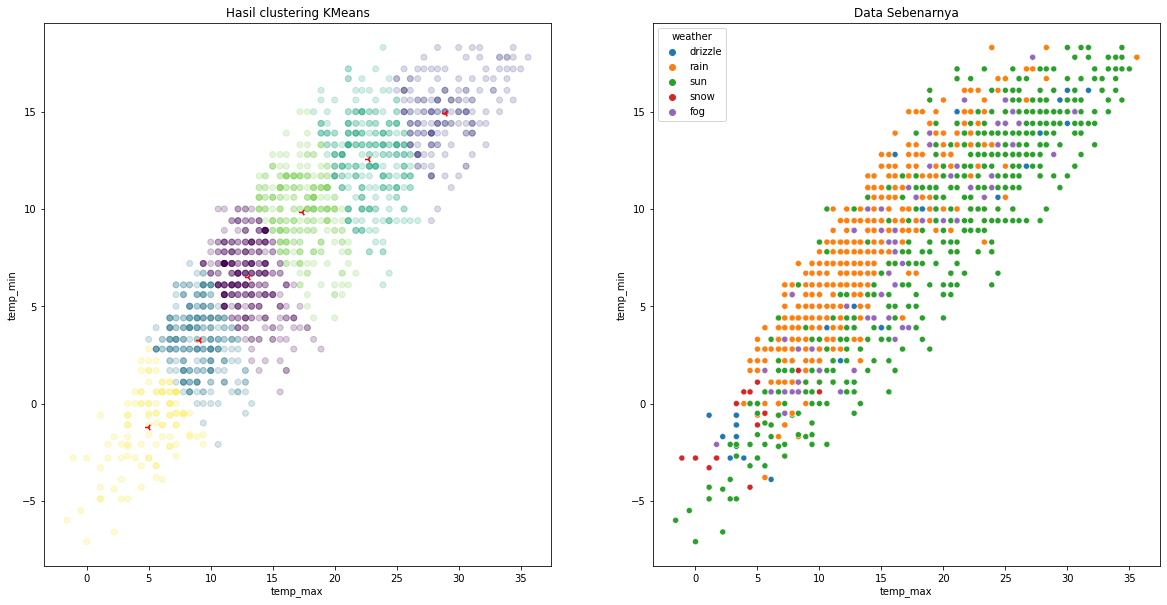

In [52]:
plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)

plt.scatter(xs, ys, alpha=0.2, c=labels)
plt.scatter(centroidX, centroidY, label="Centroid", marker="3", s=50, color='red')
plt.xlabel("temp_max")
plt.ylabel("temp_min")
plt.title("Hasil clustering KMeans")

plt.subplot(1,2,2)

dfaktual = df[['temp_max', 'temp_min', 'weather']]
sns.scatterplot(x = "temp_max", y = "temp_min", data = dfaktual, hue = "weather")
plt.title("Data Sebenarnya")

plt.show()